# Pymaceuticals Inc.
---

### Analysis

Based on the summary statistics, the Ramicane drug regimen seems to have the most consistent results among all drugs tested. Ramicane has the most similar mean and median, and the smallest variance and standard deviation values with the statistics. The Capomulin is a very close second when comparing these statistics. 

Based on the bar chart, Capomulin and Ramicane had more observations than other drug regimes, over 200 timepoints were recorded for each drug, while all other drugs recorded less than 200 timepoints. 

Based on the box plot, mice being treated with Capomulin and Ramicane showed significantly higher reductions in tumor volume, when compared to Infubinol and Celtamin. 

Based on the scatter plot, there is a positive correlation between mouse weight and average tumor volume. As the mouse weight increases, the average tumor volume increases as well. or.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combo_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
combo_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mouse_count = len(combo_df["Mouse ID"].unique())
mouse_count


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combo_df.loc[combo_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_only = combo_df[combo_df.iloc[:,0]=="g989"]
g989_only


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combo = combo_df[combo_df["Mouse ID"] !="g989"]
clean_combo.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_combo["Mouse ID"].unique())
clean_mouse_count


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tv_mean = clean_combo["Tumor Volume (mm3)"].groupby(clean_combo["Drug Regimen"]).mean()
tv_median = clean_combo["Tumor Volume (mm3)"].groupby(clean_combo["Drug Regimen"]).median()
tv_variance = clean_combo["Tumor Volume (mm3)"].groupby(clean_combo["Drug Regimen"]).var()
tv_stand_dev = clean_combo["Tumor Volume (mm3)"].groupby(clean_combo["Drug Regimen"]).std()
tv_stand_err = clean_combo["Tumor Volume (mm3)"].groupby(clean_combo["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
statistics_summary = pd.DataFrame({"Mean Tumor Volume": tv_mean,
                                    "Median Tumor Volume": tv_median, 
                                    "Tumor Volume Variance": tv_variance, 
                                    "Tumor Volume Std. Dev.": tv_stand_dev, 
                                    "Tumor Volume Std. Err.": tv_stand_err})

statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_summary = clean_combo.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "sem"])
aggregation_summary


Tumor Volume (mm3)                                
                           mean     median        var       sem
Drug Regimen                                                   
Capomulin             40.675741  41.557809  24.947764  0.329346
Ceftamin              52.591172  51.776157  39.290177  0.469821
Infubinol             52.884795  51.820584  43.128684  0.492236
Ketapril              55.235638  53.698743  68.553577  0.603860
Naftisol              54.331565  52.509285  66.173479  0.596466
Placebo               54.033581  52.288934  61.168083  0.581331
Propriva              52.320930  50.446266  43.852013  0.544332
Ramicane              40.216745  40.673236  23.486704  0.320955
Stelasyn              54.233149  52.431737  59.450562  0.573111
Zoniferol             53.236507  51.818479  48.533355  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Get counts of Mouse ID/timepoints for each drug regimen and store in dataframe
timepoints_obv = clean_combo["Drug Regimen"].value_counts()
timepoints_obv

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

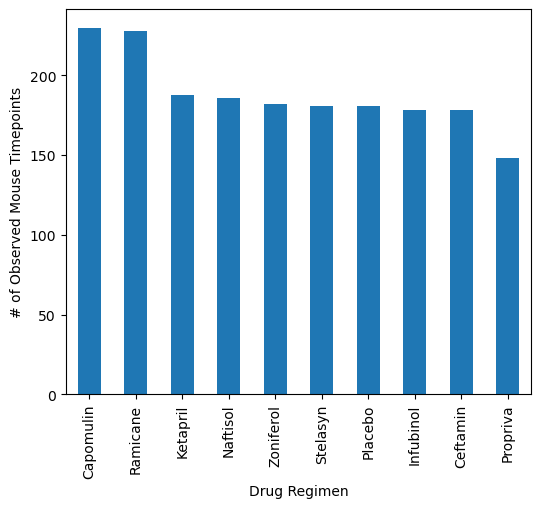

In [10]:
# Plot counts by each drug regimen
time_chart = timepoints_obv.plot(kind='bar', figsize=(6,5))
time_chart.set_ylabel("# of Observed Mouse Timepoints")
time_chart.set_xlabel("Drug Regimen")

plt.show()

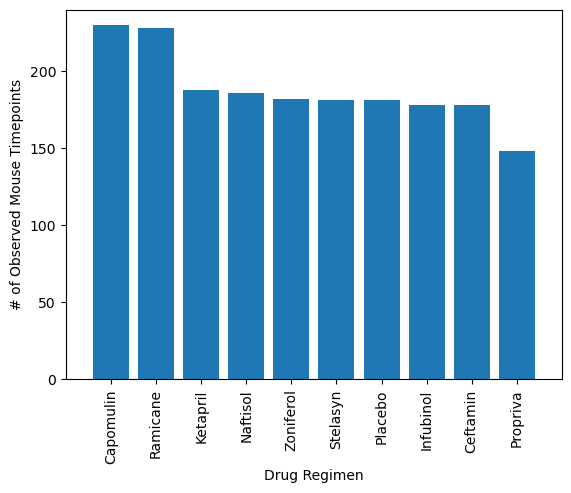

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# set x & y a axis based on timepoints_obv
x_axis = timepoints_obv.index.values
y_axis = timepoints_obv.values

# Create a list indicatng where to write x lables and set figure size to adjust for space
plt.bar(x_axis, y_axis, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

# set limits that will automatically adjust for space
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+10)

plt.show()


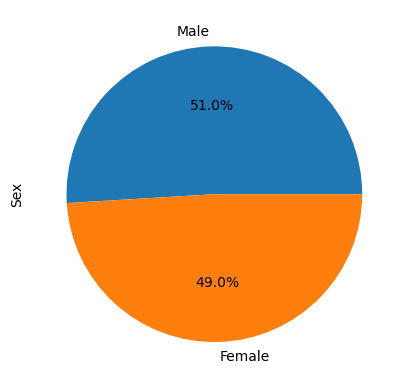

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Get the counts of female vs male from combined dataframe
mouse_gender = clean_combo["Sex"].value_counts().rename("Sex")
gender_df = mouse_gender.to_frame()

gender_pie = gender_df.plot(kind="pie", y="Sex", autopct="%1.1f%%", legend=False)

plt.show()


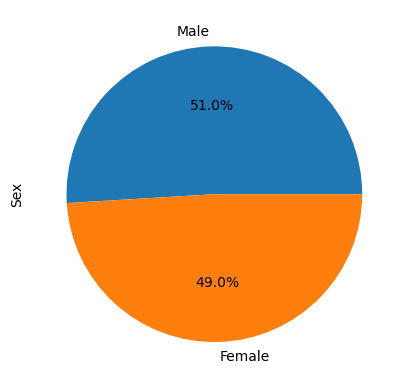

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# set x & y a axis based on mouse_gender dataframe
labels = "Male", "Female"
plt.pie(mouse_gender, labels = labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_combo.groupby("Mouse ID").max()["Timepoint"]
max_time = max_timepoint.to_frame()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Merge max time dataframe with original in an inner join so only matching data is kept
max_time_merge = pd.merge(max_time, clean_combo, on=["Mouse ID", "Timepoint"], how="inner")

# Filtering data down to 4 treatment types mentioned above
filtered_max_time = max_time_merge.loc[(max_time_merge["Drug Regimen"] == "Capomulin") |
                                        (max_time_merge["Drug Regimen"] == "Ramicane") |
                                         (max_time_merge["Drug Regimen"] == "Infubinol") |
                                          (max_time_merge["Drug Regimen"] == "Ceftamin"), :]

filtered_max_time.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    tumor_volume = filtered_max_time.loc[filtered_max_time["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartile[0.25]
    upperq = quartile[0.75]
    iqr = upperq - lowerq
       
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volume.loc[(tumor_volume > upper_bound) | (tumor_volume < lower_bound)]

    # Print statement showing outliers 
    print(f"{drug}\'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


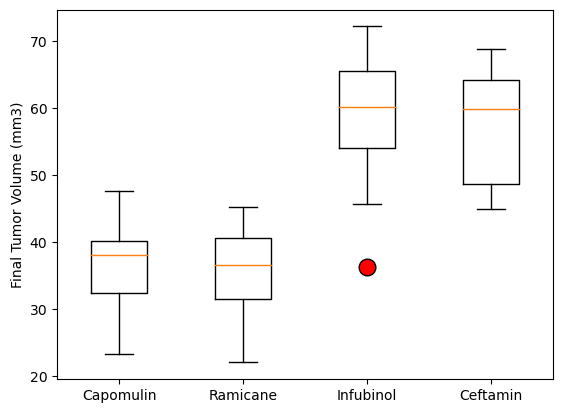

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, labels=treatments, flierprops = dict(markerfacecolor = "r", markersize = 12))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

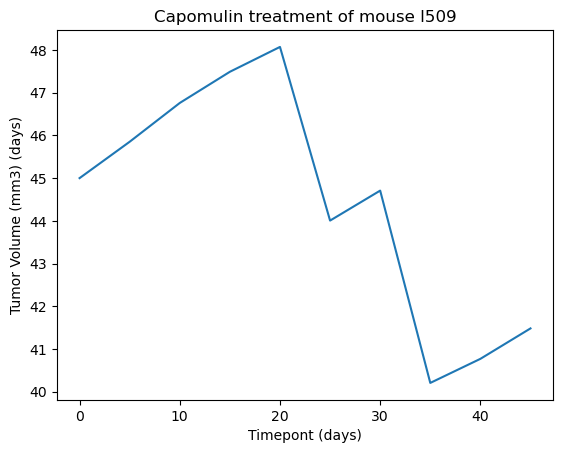

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = clean_combo.loc[clean_combo["Mouse ID"] == "l509"]

x_axis = mouse_l509["Timepoint"]
y_axis = mouse_l509["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepont (days)")
plt.ylabel("Tumor Volume (mm3) (days)")

plt.show()


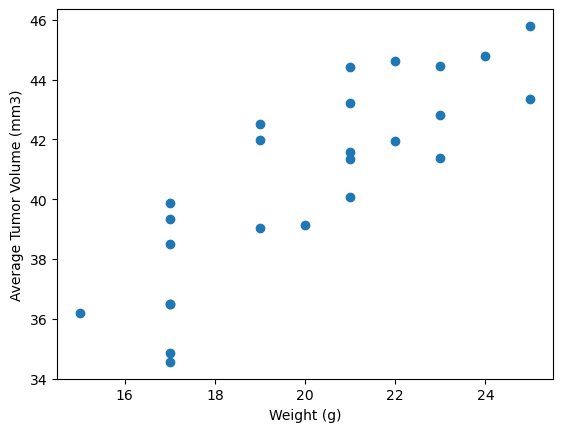

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter dataframe to only capomulin subjects
capomulin_only = clean_combo.loc[(clean_combo["Drug Regimen"] == "Capomulin")]
capomulin_by_mouse = capomulin_only.groupby("Mouse ID")

# Find average weight and tumor volume
avg_weight = capomulin_by_mouse["Weight (g)"].mean()
avg_volume = capomulin_by_mouse["Tumor Volume (mm3)"].mean()

# Create new dataframe with averages data
avg_capomulin = pd.DataFrame({"Weight (g)": avg_weight, "Tumor Volume (mm3)": avg_volume})

# Create scatter plot
cap_weight = avg_capomulin["Weight (g)"]
cap_volume = avg_capomulin["Tumor Volume (mm3)"]

plt.scatter(cap_weight, cap_volume, marker="o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


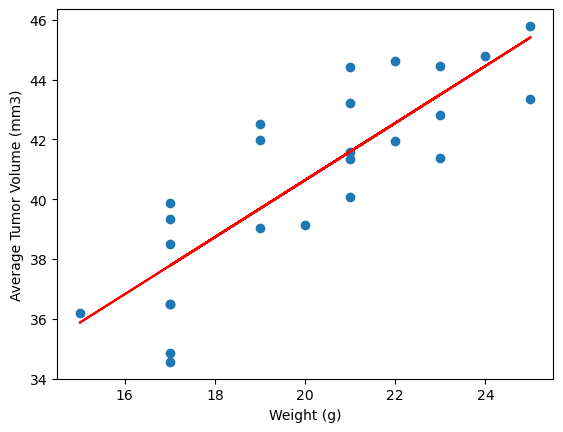

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_weight, cap_volume)
regress = cap_weight * slope + intercept

correlation = st.pearsonr(cap_weight,cap_volume)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

# Plot the scatter plot and regression line
plt.scatter(cap_weight, cap_volume, marker="o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(cap_weight, regress, "r")
plt.show()
